<a href="https://colab.research.google.com/github/RickyMacharm/Cassava/blob/master/Cassava_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rickyscharm","key":"ef82a138d479e46dd88f90cf1f580fda"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 May 11 20:44 kaggle.json


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Cassava/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:

folder = 'images'

path = Path(base_dir + 'data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
# copy and paste the data url from kaggle here
!kaggle competitions download -c cassava-disease

  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 12.5MB/s]
 99% 508M/515M [00:09<00:00, 65.1MB/s]
100% 515M/515M [00:09<00:00, 54.7MB/s]
 99% 772M/777M [00:05<00:00, 154MB/s]
100% 777M/777M [00:05<00:00, 148MB/s]
 99% 1.04G/1.04G [00:08<00:00, 161MB/s]
100% 1.04G/1.04G [00:08<00:00, 136MB/s]


In [0]:
#unzip all files
!unzip \*.zip

Archive:  test.zip
   creating: test/
   creating: test/0/
  inflating: test/0/test-img-2397.jpg  
  inflating: test/0/test-img-3089.jpg  
  inflating: test/0/test-img-1846.jpg  
  inflating: test/0/test-img-863.jpg  
  inflating: test/0/test-img-877.jpg  
  inflating: test/0/test-img-1852.jpg  
  inflating: test/0/test-img-2383.jpg  
  inflating: test/0/test-img-687.jpg  
  inflating: test/0/test-img-693.jpg  
  inflating: test/0/test-img-1885.jpg  
  inflating: test/0/test-img-2354.jpg  
  inflating: test/0/test-img-2432.jpg  
  inflating: test/0/test-img-678.jpg  
  inflating: test/0/test-img-2426.jpg  
  inflating: test/0/test-img-3738.jpg  
  inflating: test/0/test-img-2340.jpg  
  inflating: test/0/test-img-1649.jpg  
  inflating: test/0/test-img-1891.jpg  
  inflating: test/0/test-img-3076.jpg  
  inflating: test/0/test-img-2368.jpg  
  inflating: test/0/test-img-1661.jpg  
  inflating: test/0/test-img-122.jpg  
  inflating: test/0/test-img-644.jpg  
  inflating: test/0/test-img

In [0]:
import os
os.chdir('/content/gdrive/My Drive/Cassava/data/images')

In [0]:
!ls

extraimages	 sample_submission_file.csv  test.zip
extraimages.zip  submission.csv		     train
__MACOSX	 test			     train.zip


In [0]:
path = Path(base_dir + 'data/images/train/')

path.mkdir(parents=True, exist_ok=True)

In [0]:
# Lets check and see the files that ready for us to use
path.ls()

[PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/cgm'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/cmd'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/healthy'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/cbb'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/cbsd'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/models'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/export.pkl'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/submission.csv')]

In [0]:
classes = ['cgm','cmd', 'healthy', 'cbb', 'cbsd']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cgm


cmd


healthy


cbb


cbsd


In [0]:
np.random.seed(44)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

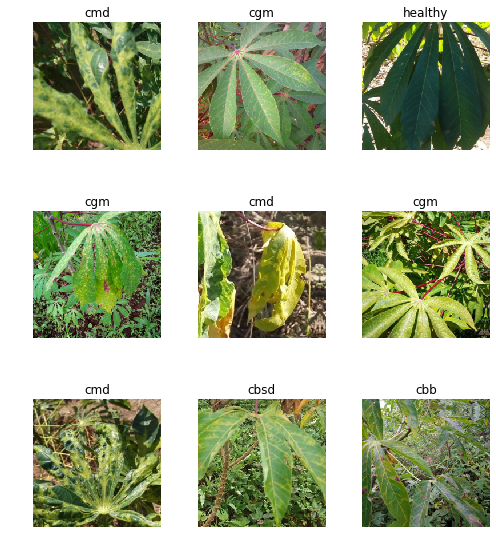

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cbb', 'cbsd', 'cgm', 'cmd', 'healthy'], 5, 4525, 1131)

In [0]:
print(data.classes)
len(data.classes),data.c

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


(5, 5)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 68753009.75it/s]


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.231303,0.762093,0.726790,14:53
1,0.909558,0.672118,0.766578,01:15
2,0.748571,0.629043,0.789567,01:13
3,0.671037,0.594878,0.803714,01:13
4,0.607276,0.587223,0.806366,01:14


In [0]:
learn.save('cassava-1')


In [0]:

learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


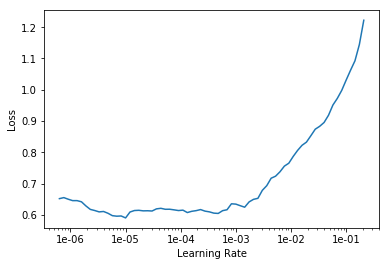

In [0]:

learn.recorder.plot()

In [0]:

learn.fit_one_cycle(5, slice(3e-05, (3e-03)/7))

epoch,train_loss,valid_loss,accuracy,time
0,0.602783,0.527277,0.824934,01:14
1,0.524813,0.508927,0.832891,01:16
2,0.418537,0.495381,0.844386,01:14
3,0.301182,0.441640,0.866490,01:15
4,0.223310,0.451587,0.855880,01:14


In [0]:
learn.save('cassava-2')

In [0]:
learn.fit_one_cycle(5, (3e-04)/7)

epoch,train_loss,valid_loss,accuracy,time
0,0.348328,0.423388,0.856764,01:14
1,0.356693,0.429180,0.859416,01:12
2,0.361123,0.426009,0.858532,01:16
3,0.355519,0.422372,0.862953,01:14
4,0.346527,0.416818,0.864721,01:16


In [0]:
learn.save('cassava-3')

In [0]:
learn.fit_one_cycle(5, slice((3e-5)/9, (3e-4)/4))

epoch,train_loss,valid_loss,accuracy,time
0,0.229739,0.460674,0.864721,01:12
1,0.230958,0.463329,0.864721,01:10
2,0.235176,0.467236,0.862069,01:13
3,0.240964,0.462620,0.864721,01:13
4,0.222881,0.464775,0.867374,01:15


In [0]:
learn.save('cassava-4')

In [0]:
learn.fit_one_cycle(4, (3e-3)/7)

epoch,train_loss,valid_loss,accuracy,time
0,0.285090,0.427068,0.860301,01:15
1,0.288374,0.434782,0.854996,01:14
2,0.250216,0.419661,0.865606,01:13
3,0.233937,0.413662,0.861185,01:12


In [0]:
learn.save('cassava-5')

In [0]:
!ls

gdrive	kaggle.json  sample_data


In [0]:
path1 = Path(base_dir + 'data/images/')
#sample_sub = path1/'Sample_Submission.csv'
#labels = path/'traininglabels.csv'

In [0]:
path11 = Path(base_dir + 'data/images/test')

In [0]:
df1 = pd.read_csv(path/'submission02.csv')
print(df1)

     Category             Id
0         cmd  test-img-2664
1         cmd  test-img-2607
2         cmd  test-img-2637
3         cmd  test-img-2853
4         cmd  test-img-2699
5         cmd  test-img-2745
6        cbsd  test-img-2805
7         cbb  test-img-2791
8         cmd  test-img-2956
9         cmd  test-img-2782
10       cbsd  test-img-2815
11       cbsd  test-img-2936
12        cmd  test-img-2705
13        cmd  test-img-2889
14       cbsd  test-img-2818
15        cmd  test-img-2824
16        cmd  test-img-2610
17        cmd  test-img-2731
18        cgm  test-img-2742
19    healthy  test-img-2955
20        cmd  test-img-2744
21        cgm  test-img-2692
22        cmd  test-img-2749
23    healthy  test-img-2619
24        cmd  test-img-2843
25    healthy  test-img-2810
26        cgm  test-img-2624
27        cgm  test-img-2870
28        cmd  test-img-2832
29        cbb  test-img-2687
...       ...            ...
3744      cmd   test-img-700
3745      NaN   test-img-641
3746      cmd 

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 2 columns):
Category    3774 non-null object
Id          3774 non-null object
dtypes: object(2)
memory usage: 59.0+ KB


In [0]:
test = ImageList.from_folder(path11/'0')#.add(ImageList.from_folder(path11/'0'))
len(test)

3774

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
thresh = 0.5
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [0]:
labelled_preds

['cmd',
 'cmd',
 'cmd',
 'cmd',
 'cmd',
 'cmd',
 'cbsd',
 'cbb',
 'cmd',
 'cmd',
 'cbsd',
 'cbsd',
 'cmd',
 'cmd',
 'cbsd',
 'cmd',
 'cmd',
 'cmd',
 'cgm',
 'healthy',
 'cmd',
 'cgm',
 'cmd',
 'healthy',
 'cmd',
 'healthy',
 'cgm',
 'cgm',
 'cmd',
 'cbb',
 'cbsd',
 'cgm',
 'cgm',
 'cbb',
 'cbb',
 'cmd',
 'cbb',
 'cbb',
 'cmd',
 'cmd',
 'cbb',
 'cmd',
 'cmd',
 'cmd',
 'cbb',
 'cmd',
 'cgm',
 'cbsd',
 'cgm',
 'cbsd',
 'cbsd',
 '',
 'cmd',
 'cbsd',
 'cmd',
 'cgm',
 'cmd',
 'cbsd',
 'healthy',
 'cbsd',
 'cbsd',
 'cbb',
 'cgm',
 'cbsd',
 'cbsd',
 'cmd',
 'cgm',
 'cbsd',
 'cbsd',
 'cbsd',
 'cbsd',
 'cmd',
 'cgm',
 '',
 'cmd',
 'cmd',
 'cmd',
 'cmd',
 'cmd',
 'cmd',
 'cgm',
 'cmd',
 'cbsd',
 'cbsd',
 'cbsd',
 'cmd',
 'cgm',
 'cbsd',
 'cmd',
 '',
 'cbsd',
 'cmd',
 'cmd',
 'cmd',
 'cbsd',
 'cgm',
 'cbsd',
 'cmd',
 'cbsd',
 'cbb',
 'cmd',
 'cmd',
 'healthy',
 'cbsd',
 'cmd',
 'cgm',
 'cmd',
 'cbb',
 'cmd',
 'healthy',
 'cbsd',
 'healthy',
 '',
 'cbsd',
 'cbsd',
 'cmd',
 'cbsd',
 'cbsd',
 'cbsd',

In [0]:
len(labelled_preds)

3774

In [0]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [0]:
df = pd.DataFrame({'Category':labelled_preds, 'Id':fnames}, columns=['Category', 'Id'])

In [0]:
df.to_csv(path/'submission02.csv', index=False)

In [0]:
import os
os.chdir(path)

In [0]:
!kaggle competitions submit -c cassava-disease -f submission02.csv -m "Message"

100% 66.7k/66.7k [00:09<00:00, 7.51kB/s]
Successfully submitted to Cassava Disease Classification 

In [0]:
learn.load('cassava-4')

Learner(data=ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cgm,cgm,cgm,cgm,cgm
Path: /content/gdrive/My Drive/Cassava/data/images/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cmd,cbsd,cmd,cbsd,cbsd
Path: /content/gdrive/My Drive/Cassava/data/images/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchN

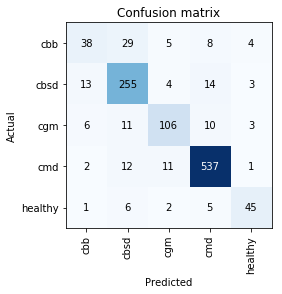

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [0]:

interp.most_confused(min_val=2)

[('cbb', 'cbsd', 29),
 ('cbsd', 'cmd', 14),
 ('cbsd', 'cbb', 13),
 ('cmd', 'cbsd', 12),
 ('cgm', 'cbsd', 11),
 ('cmd', 'cgm', 11),
 ('cgm', 'cmd', 10),
 ('cbb', 'cmd', 8),
 ('cgm', 'cbb', 6),
 ('healthy', 'cbsd', 6),
 ('cbb', 'cgm', 5),
 ('healthy', 'cmd', 5),
 ('cbb', 'healthy', 4),
 ('cbsd', 'cgm', 4),
 ('cbsd', 'healthy', 3),
 ('cgm', 'healthy', 3),
 ('cmd', 'cbb', 2),
 ('healthy', 'cgm', 2)]

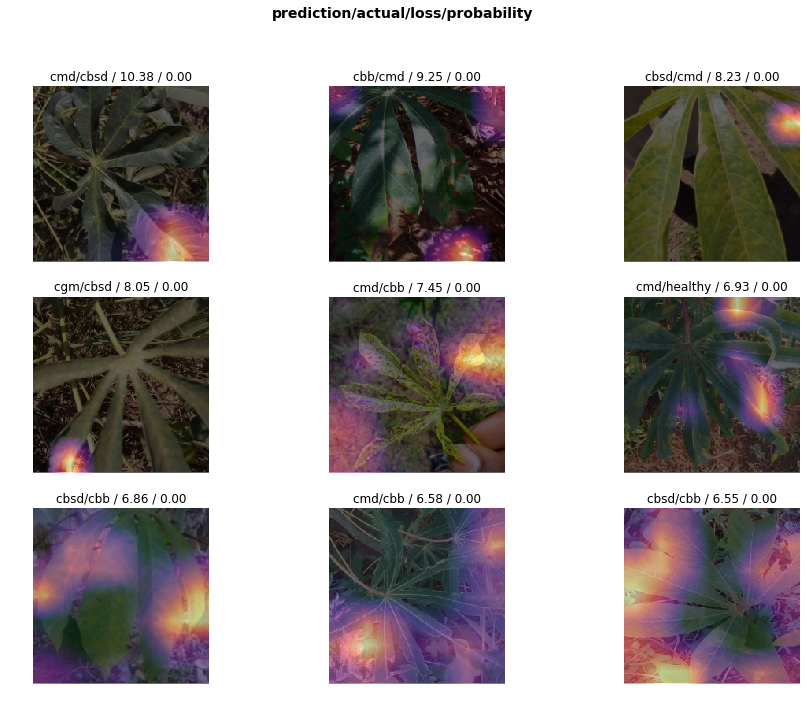

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.export()